### EV Data Exploration and Visualization

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math

from numpy.random import normal
from numpy.random import seed
import random

pd.options.display.max_columns = None

In [4]:
ev = pd.read_csv('Resources/ev_new.csv')
print(ev.shape)
ev.head(2)


(257038, 15)


,County,Latitude,Longitude,Year,Make,Model,Vehicle Type,CAFV Eligibility,Year_Make_Model,POP_2025,Median Income,MSRP,Dest. Charge,Tax Credit,Electric Range
0,yakima,46.60464,-120.50729,2024,TESLA,MODEL 3,BEV,Eligible,2024 TESLA MODEL 3,264650,76662,44865,1515,5625,306
1,king,47.53010,-122.03439,2021,AUDI,E-TRON,BEV,Eligible,2021 AUDI E-TRON,2411700,154490,65900,1095,7500,222


In [5]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257038 entries, 0 to 257037
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   County            257038 non-null  object 
 1   Latitude          257038 non-null  float64
 2   Longitude         257038 non-null  float64
 3   Year              257038 non-null  int64  
 4   Make              257038 non-null  object 
 5   Model             257038 non-null  object 
 6   Vehicle Type      257038 non-null  object 
 7   CAFV Eligibility  257038 non-null  object 
 8   Year_Make_Model   257038 non-null  object 
 9   POP_2025          257038 non-null  int64  
 10  Median Income     257038 non-null  int64  
 11  MSRP              257038 non-null  int64  
 12  Dest. Charge      257038 non-null  int64  
 13  Tax Credit        257038 non-null  int64  
 14  Electric Range    257038 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 29.4+ MB


### EVs vs. Year

Number of EVs for each year
{2023: 59892, 2024: 50729, 2022: 29415, 2025: 26374, 2021: 20789, 2018: 14507, 2020: 12310, 2019: 11030, 2017: 8753, 2016: 5257, 2015: 4585, 2013: 4087, 2026: 3866, 2014: 3313, 2012: 1442, 2011: 637, 2010: 22, 2008: 20, 2000: 8, 2003: 1, 2002: 1}




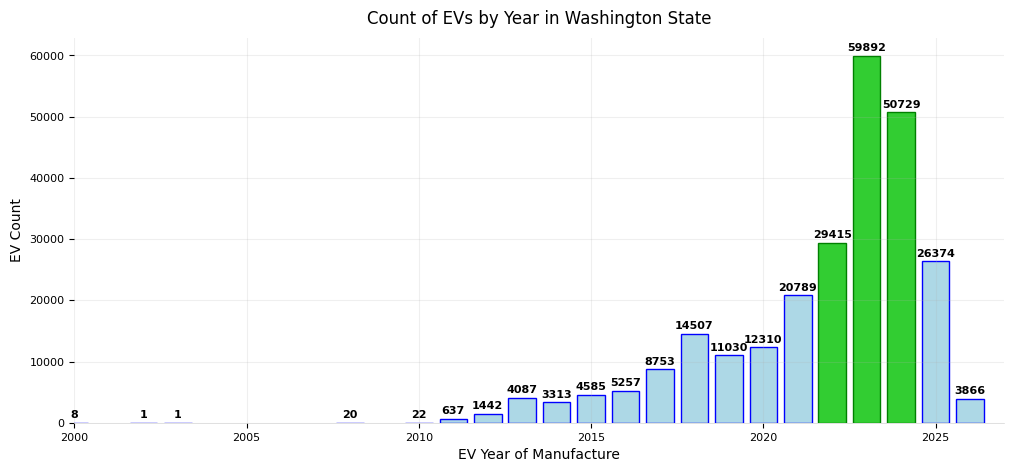

In [6]:

val_freq = ev['Year'].value_counts()  # Create dictionary (below) for y-axis values
cat_names = ev['Year'].unique()   # Create dictionary (below) for x-axis values

Year_count = {cat: val_freq[cat] for cat in cat_names}

sorted_Year_count = {r: Year_count[r] for r in sorted(Year_count, key=Year_count.get, reverse=True)}
print(f'Number of EVs for each year\n{sorted_Year_count}\n\n')

plt.rcParams["figure.figsize"] = (12,5)

# Top 3 Make keys and their counts
top_3_Year = list(sorted_Year_count.keys())[:3]
top_3_counts = [sorted_Year_count[year] for year in top_3_Year]

# Plot the filtered keys and values
bars = plt.bar(sorted_Year_count.keys(), sorted_Year_count.values(), color='lightblue', edgecolor='b')

# Color the top 3 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i < 3 and bar.get_height() > 10:
        # bar.set_color('green')
        bar.set_facecolor('limegreen')
        bar.set_edgecolor('green')

# Add value labels on top of each bar
plt.bar_label(bars, fmt='%d', fontsize=8, fontweight='bold', padding=2, rotation=0)

plt.xticks(fontsize=8)
plt.xlim(2000, 2027)
# plt.ylim(0, 1000)
plt.yticks(fontsize=8)
plt.xlabel('EV Year of Manufacture', fontsize=10)
plt.ylabel('EV Count', fontsize=10)
plt.title('Count of EVs by Year in Washington State', fontsize=12, pad=10)
plt.grid(True, alpha = 0.2)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

# plt.savefig("../Output_data/Fig1.png")
plt.show()


### The most popular Make & Model

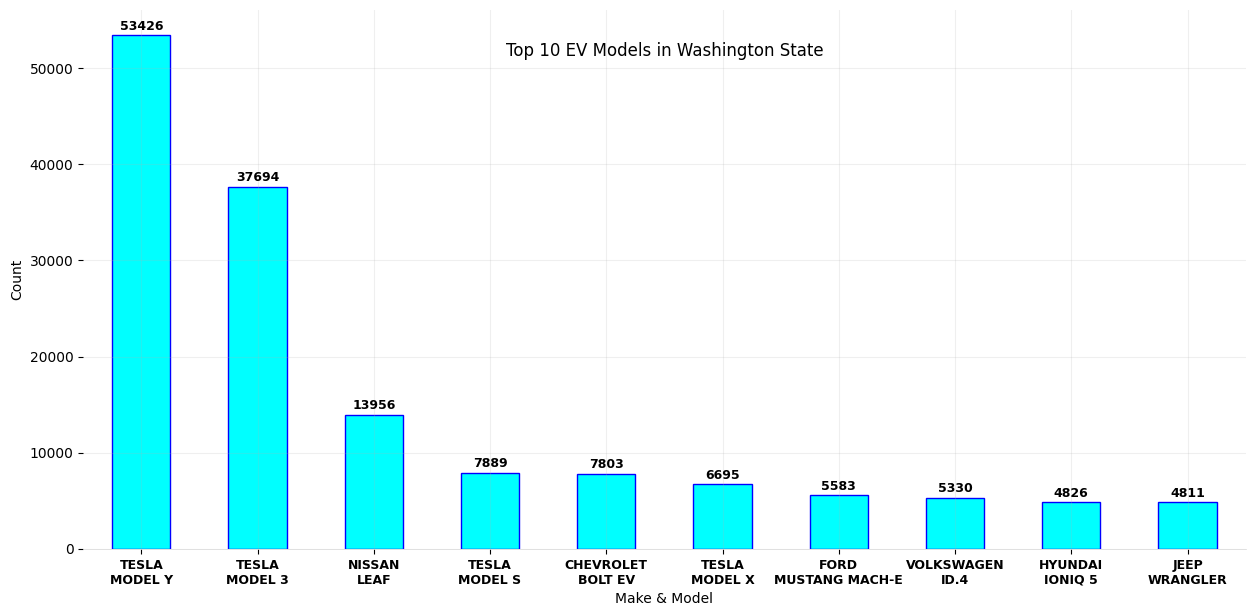

In [7]:
model_ev = ev[['Make', 'Model']].value_counts()
model_ev_10 = model_ev.nlargest(10)

# Convert tuple index (Make, Model) → single string "Make Model"
model_ev_10.index = [f"{make}\n{model}" for make, model in model_ev_10.index]

plt.rcParams["figure.figsize"] = (12,5)
model = model_ev_10.plot(kind="bar", figsize = (15, 7), facecolor = 'cyan', edgecolor = 'b')
# Add value labels on top of each bar
plt.bar_label(model.containers[0], fmt='%d', fontsize=9, fontweight='bold', padding=2, rotation=0)

plt.xticks(rotation=0, ha='center', fontsize=9, fontweight='bold')
plt.xlabel("Make & Model", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Top 10 EV Models in Washington State", fontsize=12, y=0.9)
plt.grid(True, alpha=0.2)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')
plt.show()

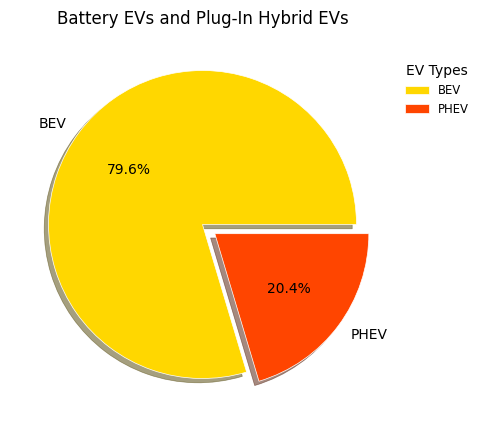

In [55]:

ev_type = ev['Vehicle Type'].value_counts()
types = ['BEV', 'PHEV']

plt.rcParams["figure.figsize"] = (5, 5)
wedges, labels, autopct_text = plt.pie(ev_type.tolist(),
                                       labels=types,
                                       colors=['gold', 'orangered'],  
                                       startangle=0, shadow=True, explode=(0, 0.1), autopct='%1.1f%%',
                                       wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

custom_legend = [f'{label}' for label, percent in zip(types, ev_type.tolist())]

plt.legend(wedges, custom_legend, title='EV Types', loc='center left', bbox_to_anchor=(1.0, 0.85), fontsize='small', edgecolor = 'white')

plt.title("Battery EVs and Plug-In Hybrid EVs")

plt.savefig("Figures/EDA_Fig03a.png")
plt.show()

### Top 10 Popular EV 'Make' in Washington

Number of EVs by Make
{'TESLA': 107244, 'CHEVROLET': 18578, 'NISSAN': 16258, 'FORD': 13706, 'KIA': 12571, 'BMW': 10631, 'TOYOTA': 10588, 'HYUNDAI': 8622, 'RIVIAN': 7803, 'VOLVO': 6655, 'VOLKSWAGEN': 6598, 'JEEP': 6573, 'AUDI': 5183, 'CHRYSLER': 3791, 'MERCEDES-BENZ': 2913, 'HONDA': 2524, 'SUBARU': 2470, 'PORSCHE': 1770, 'CADILLAC': 1592, 'POLESTAR': 1453, 'MAZDA': 1281, 'MINI': 1202, 'MITSUBISHI': 1168, 'LEXUS': 1162, 'FIAT': 850, 'DODGE': 757, 'LUCID': 477, 'GMC': 467, 'GENESIS': 431, 'LINCOLN': 417, 'ACURA': 335, 'SMART': 241, 'JAGUAR': 208, 'LAND ROVER': 184, 'FISKER': 144, 'ALFA ROMEO': 100, 'BRIGHTDROP': 40, 'LAMBORGHINI': 13, 'RAM': 9, 'BENTLEY': 8, 'ROLLS-ROYCE': 6, 'TH!NK': 5, 'AZURE DYNAMICS': 4, 'VINFAST': 2, 'WHEEGO ELECTRIC CARS': 2, 'MULLEN AUTOMOTIVE INC.': 2}




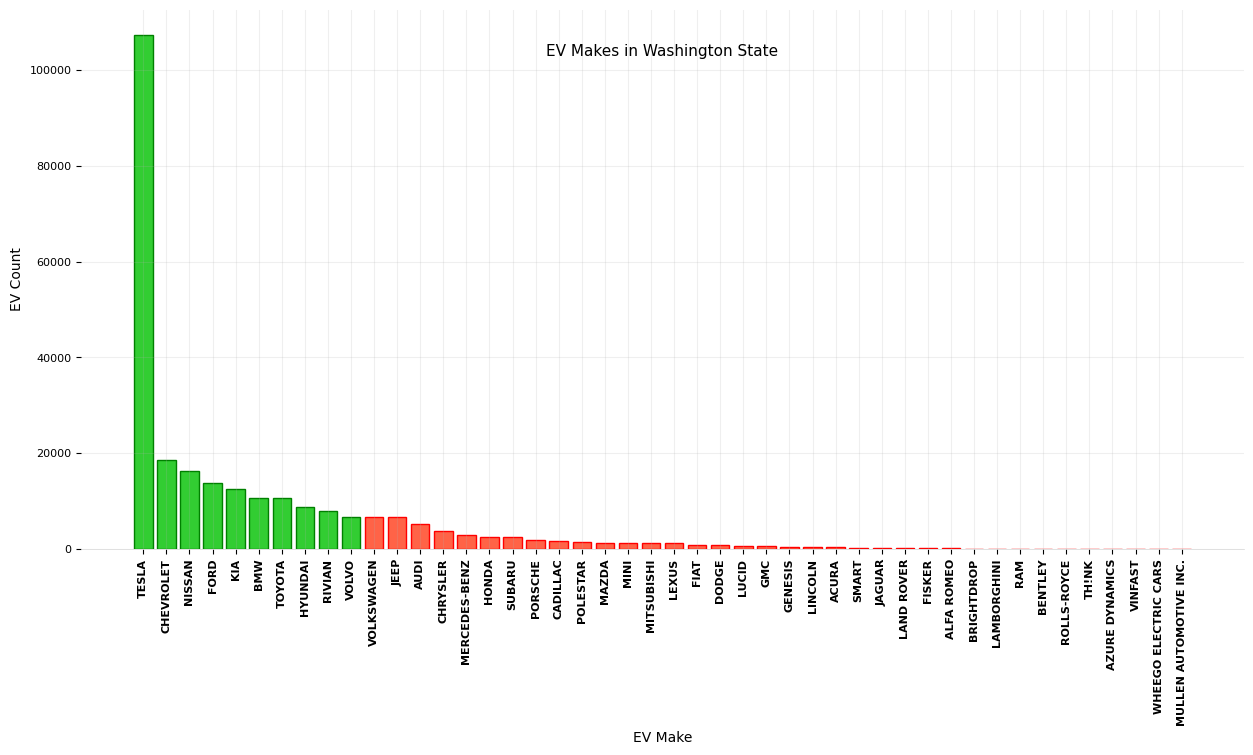

In [9]:

val_freq = ev['Make'].value_counts()  # Create dictionary (below) for y-axis values
cat_names = ev['Make'].unique()   # Create dictionary (below) for x-axis values

Make_count = {cat: ev['Make'].value_counts()[cat] for cat in cat_names}
sorted_Make_count = {r: Make_count[r] for r in sorted(Make_count, key=Make_count.get, reverse=True)}
print(f'Number of EVs by Make\n{sorted_Make_count}\n\n')

plt.rcParams["figure.figsize"] = (15,7)

# Get the top 10 Make keys and their counts
top_10_Make = list(sorted_Make_count.keys())[:10]
top_10_counts = [sorted_Make_count[make] for make in top_10_Make]

# Plot the filtered keys and values
plt.bar(sorted_Make_count.keys(), sorted_Make_count.values(), color='tomato', edgecolor='red')

# Color the top 10 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i < 10 and bar.get_height() > 10:
        bar.set_facecolor('limegreen')
        bar.set_edgecolor('green')

plt.xlabel(r'EV Make', fontsize=10)
plt.ylabel(r'EV Count', fontsize=10)
plt.title('EV Makes in Washington State', fontsize=11, y=0.9)
plt.xticks(rotation=90, fontsize=8, fontweight='bold')
plt.yticks(fontsize=8)
plt.grid(True, alpha = 0.2)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')
# plt.savefig("../Output_data/Fig5.png")
plt.show()


#### County Population vs. Number of EVs

{county:EV_Count}
 {'yakima': 1724, 'king': 128272, 'snohomish': 31810, 'thurston': 9344, 'whitman': 525, 'kittitas': 936, 'pierce': 21314, 'whatcom': 6297, 'benton': 3468, 'klickitat': 458, 'chelan': 1601, 'douglas': 572, 'spokane': 7247, 'kitsap': 8651, 'san juan': 1217, 'skagit': 3015, 'clark': 15644, 'grant': 960, 'cowlitz': 1343, 'lewis': 1136, 'island': 2831, 'franklin': 1042, 'walla walla': 700, 'grays harbor': 972, 'mason': 1266, 'asotin': 99, 'pacific': 316, 'jefferson': 1334, 'okanogan': 391, 'clallam': 1558, 'skamania': 249, 'pend oreille': 88, 'stevens': 321, 'wahkiakum': 89, 'ferry': 44, 'lincoln': 79, 'adams': 99, 'columbia': 22, 'garfield': 4} 


{county: population}
 {'yakima': 264650, 'king': 2411700, 'snohomish': 873800, 'thurston': 309100, 'whitman': 49450, 'kittitas': 48950, 'pierce': 959900, 'whatcom': 240500, 'benton': 219625, 'klickitat': 23600, 'chelan': 82900, 'douglas': 45450, 'spokane': 566000, 'kitsap': 288900, 'san juan': 18550, 'skagit': 134600, 'clark': 5

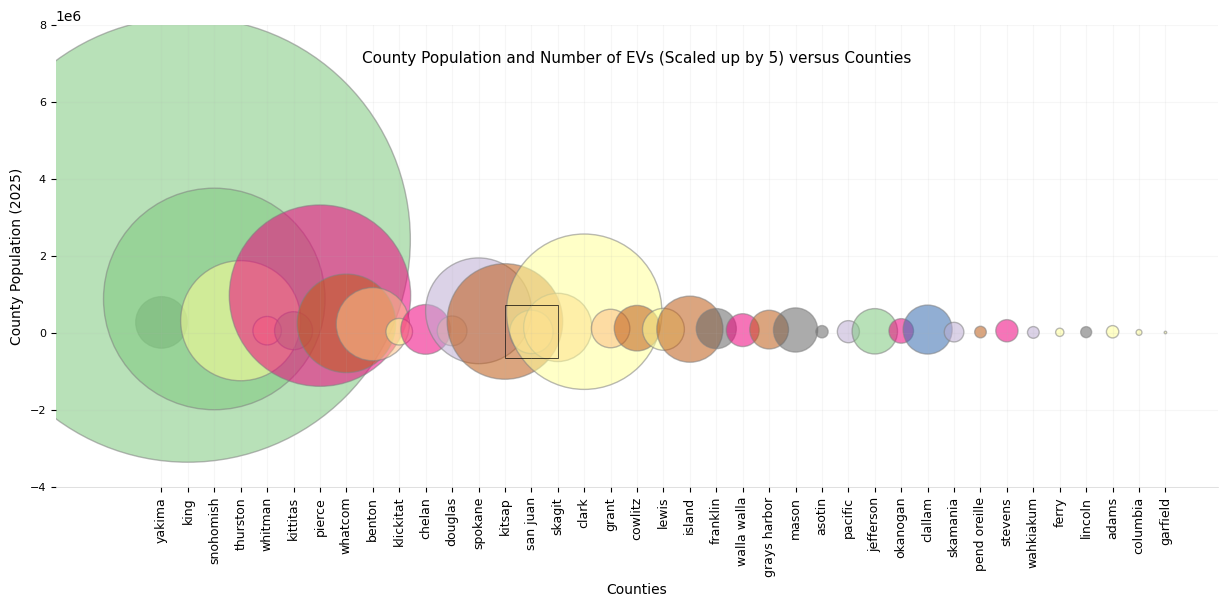

In [10]:
# Bubble Plot
# Population in each county
county_pop = ev.groupby('County')['POP_2025']     # Create dictionary (below) for y-axis values

# Number of EVs in each county
val_count = ev['County'].value_counts()    # Create dictionary (below) using value_counts()
uniq_names = ev['County'].unique()

county_count = {uniq: ev['County'].value_counts()[uniq] for uniq in uniq_names}  # Dictionary {county:num_EVs}
print('{county:EV_Count}\n', county_count, '\n\n')
county_count_vals = [county_count[uniq] for uniq in county_count.keys()] # List of number of EVs in each county

name_pop = {county: county_pop.get_group(county).values[0] for county in county_count.keys()}  # Dictionary {county: population}
print('{county: population}\n', name_pop, '\n\n')

#size of bubble is the number of EVs
scaled_county_count_vals = np.multiply(county_count_vals, 0.8)  # Scaled 0.8

colors = np.random.rand(len(uniq_names))
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter(name_pop.keys(), name_pop.values(), s = scaled_county_count_vals, c = colors, cmap = 'Accent', edgecolors = 'gray', alpha = 0.55)
# Highlight "San Juan" with a square marker
san_juan_x = list(name_pop.keys()).index('san juan')   # x-position of San Juan
san_juan_y = name_pop['san juan']                      # y-position (population)
san_juan_size = scaled_county_count_vals[san_juan_x]   # same bubble size

plt.scatter(san_juan_x, san_juan_y,
            s=san_juan_size * 1.5,   # make slightly larger if desired
            marker='s',              # 's' = square
            edgecolor='black',
            facecolor='none',        # transparent fill
            linewidth=0.5,
            label='San Juan')        # optional legend label

plt.xlabel(r'Counties', fontsize=10)
plt.ylabel(r'County Population (2025)', fontsize=10)
plt.title('County Population and Number of EVs (Scaled up by 5) versus Counties', fontsize=11, y=0.9)
plt.xticks(rotation=90, fontsize=9, fontweight='normal')
plt.yticks(fontsize=8)
plt.xlim(-4, len(name_pop.keys()) + 1)
plt.ylim(ymin=-4e6, ymax = 8e6)
plt.grid(True, alpha = 0.1)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

# plt.savefig("../Output_data/Fig6.png")
plt.show()



#### EVs Per Capita in a County


{County: EV_Population %}
{'yakima': 0.65, 'king': 5.32, 'snohomish': 3.64, 'thurston': 3.02, 'whitman': 1.06, 'kittitas': 1.91, 'pierce': 2.22, 'whatcom': 2.62, 'benton': 1.58, 'klickitat': 1.94, 'chelan': 1.93, 'douglas': 1.26, 'spokane': 1.28, 'kitsap': 2.99, 'san juan': 6.56, 'skagit': 2.24, 'clark': 2.88, 'grant': 0.9, 'cowlitz': 1.17, 'lewis': 1.33, 'island': 3.19, 'franklin': 1.01, 'walla walla': 1.1, 'grays harbor': 1.25, 'mason': 1.87, 'asotin': 0.44, 'pacific': 1.32, 'jefferson': 3.94, 'okanogan': 0.9, 'clallam': 1.98, 'skamania': 2.05, 'pend oreille': 0.63, 'stevens': 0.67, 'wahkiakum': 1.96, 'ferry': 0.6, 'lincoln': 0.7, 'adams': 0.46, 'columbia': 0.56, 'garfield': 0.17}




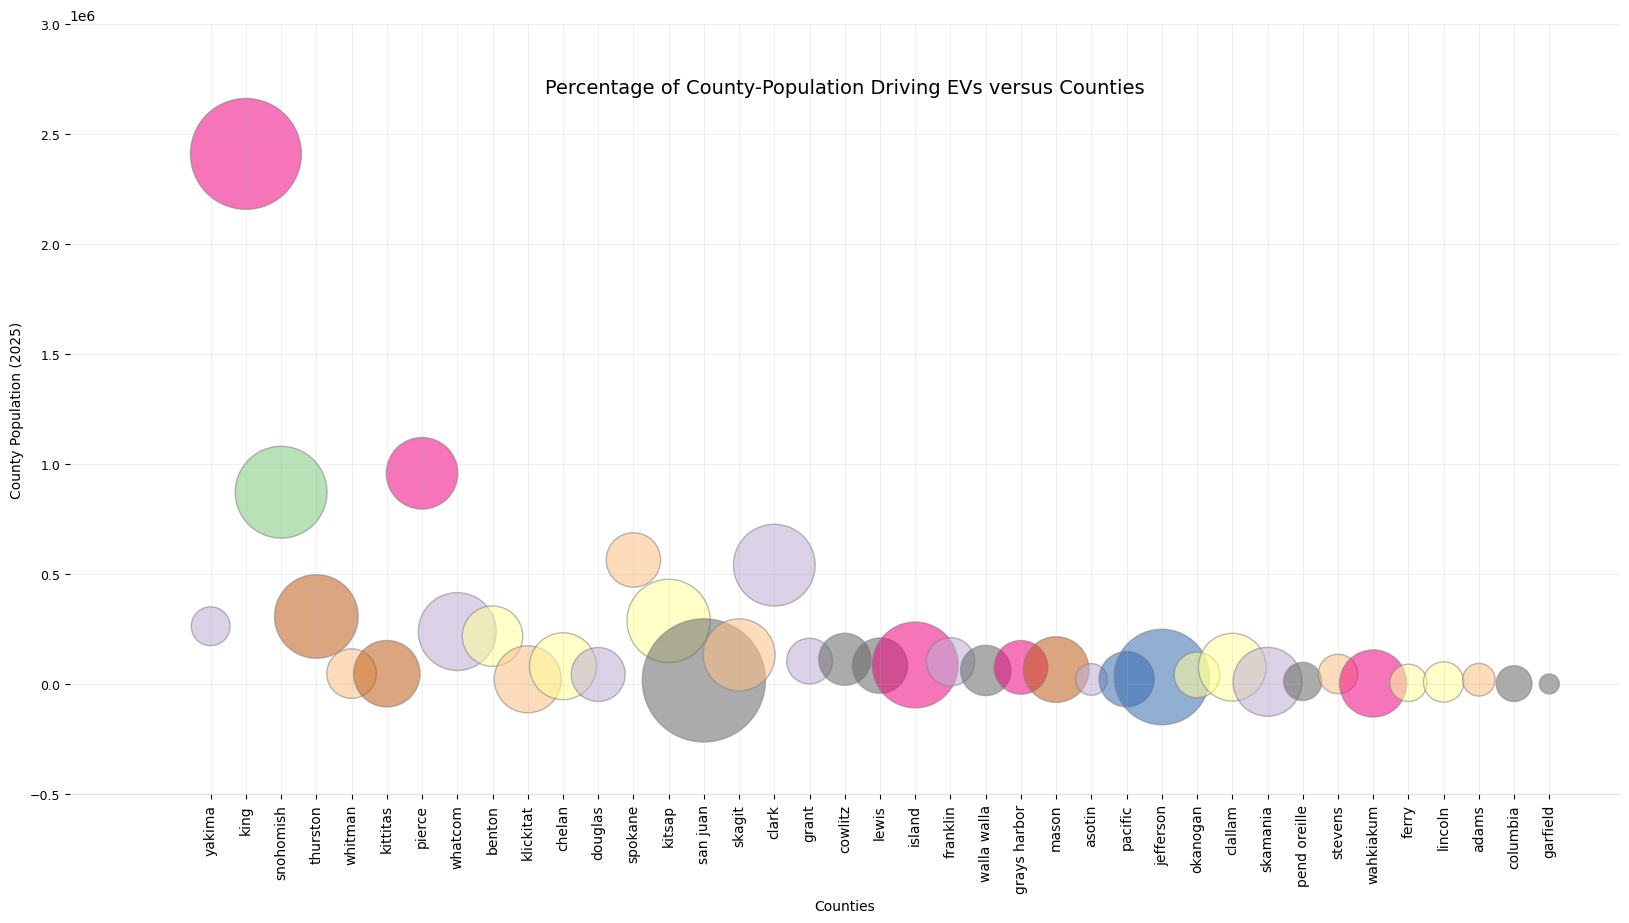

In [13]:

# {County name: County population} dictionary
name_pop = {county: county_pop.get_group(county).values[0] for county in county_count.keys()}

# List of ratio = (EV Count)/(County population)
ev_pop_ratio = [county_count_vals[i] / name_pop[list(county_count.keys())[i]] for i in range(len(county_count_vals))]
ev_pop_ratio_percentage = [round(value*100, 2) for value in ev_pop_ratio]  # Ratio to %

# Bubble size
scaled_county_count_vals = np.multiply(ev_pop_ratio, 1.2e5)  # Scaled up by 1.2e5

ratio_dict = {county: ev_pop_ratio_percentage[i] for i, county in enumerate(county_count.keys())}  # Dictionary {county: population ratio}
print(f'\n{{County: EV_Population %}}\n{ratio_dict}\n\n')

colors = np.random.rand(len(uniq_names))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(name_pop.keys(), name_pop.values(), s = scaled_county_count_vals, c = colors, cmap = 'Accent', edgecolors = 'gray', alpha = 0.55)

plt.xlabel(r'Counties', fontsize=10)
plt.ylabel(r'County Population (2025)', fontsize=10)
plt.title('Percentage of County-Population Driving EVs versus Counties', fontsize=14, y=0.9)
plt.xticks(rotation=90, fontsize=10, fontweight='normal')
plt.yticks(fontsize=9)
plt.xlim(-4, len(name_pop.keys()) + 1)
plt.ylim(ymin=-0.5e6, ymax = 3e6)
plt.grid(True, alpha = 0.2)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

# plt.savefig("../Output_data/Fig7.png")
plt.show()


#### Family Income and EVs

In [29]:
# Count EVs per unique (Longitude, Latitude)
counts = ev[["Longitude", "Latitude"]].value_counts().reset_index(name="EV_count")
ev = ev.merge(counts, on=["Longitude", "Latitude"], how="left")
# ev.head()

#### Median Income vs. EV Adoption


{County: EVs_Income %}
{'yakima': 2.25, 'king': 83.03, 'snohomish': 24.95, 'thurston': 8.35, 'whitman': 0.58, 'kittitas': 0.94, 'pierce': 19.18, 'whatcom': 6.14, 'benton': 3.36, 'klickitat': 0.53, 'chelan': 1.74, 'douglas': 0.64, 'spokane': 7.69, 'kitsap': 7.55, 'san juan': 1.16, 'skagit': 3.04, 'clark': 14.36, 'grant': 1.21, 'cowlitz': 1.55, 'lewis': 1.34, 'island': 2.7, 'franklin': 1.18, 'walla walla': 0.77, 'grays harbor': 1.22, 'mason': 1.38, 'asotin': 0.12, 'pacific': 0.38, 'jefferson': 1.36, 'okanogan': 0.54, 'clallam': 1.84, 'skamania': 0.24, 'pend oreille': 0.11, 'stevens': 0.39, 'wahkiakum': 0.13, 'ferry': 0.06, 'lincoln': 0.09, 'adams': 0.14, 'columbia': 0.02, 'garfield': 0.0}




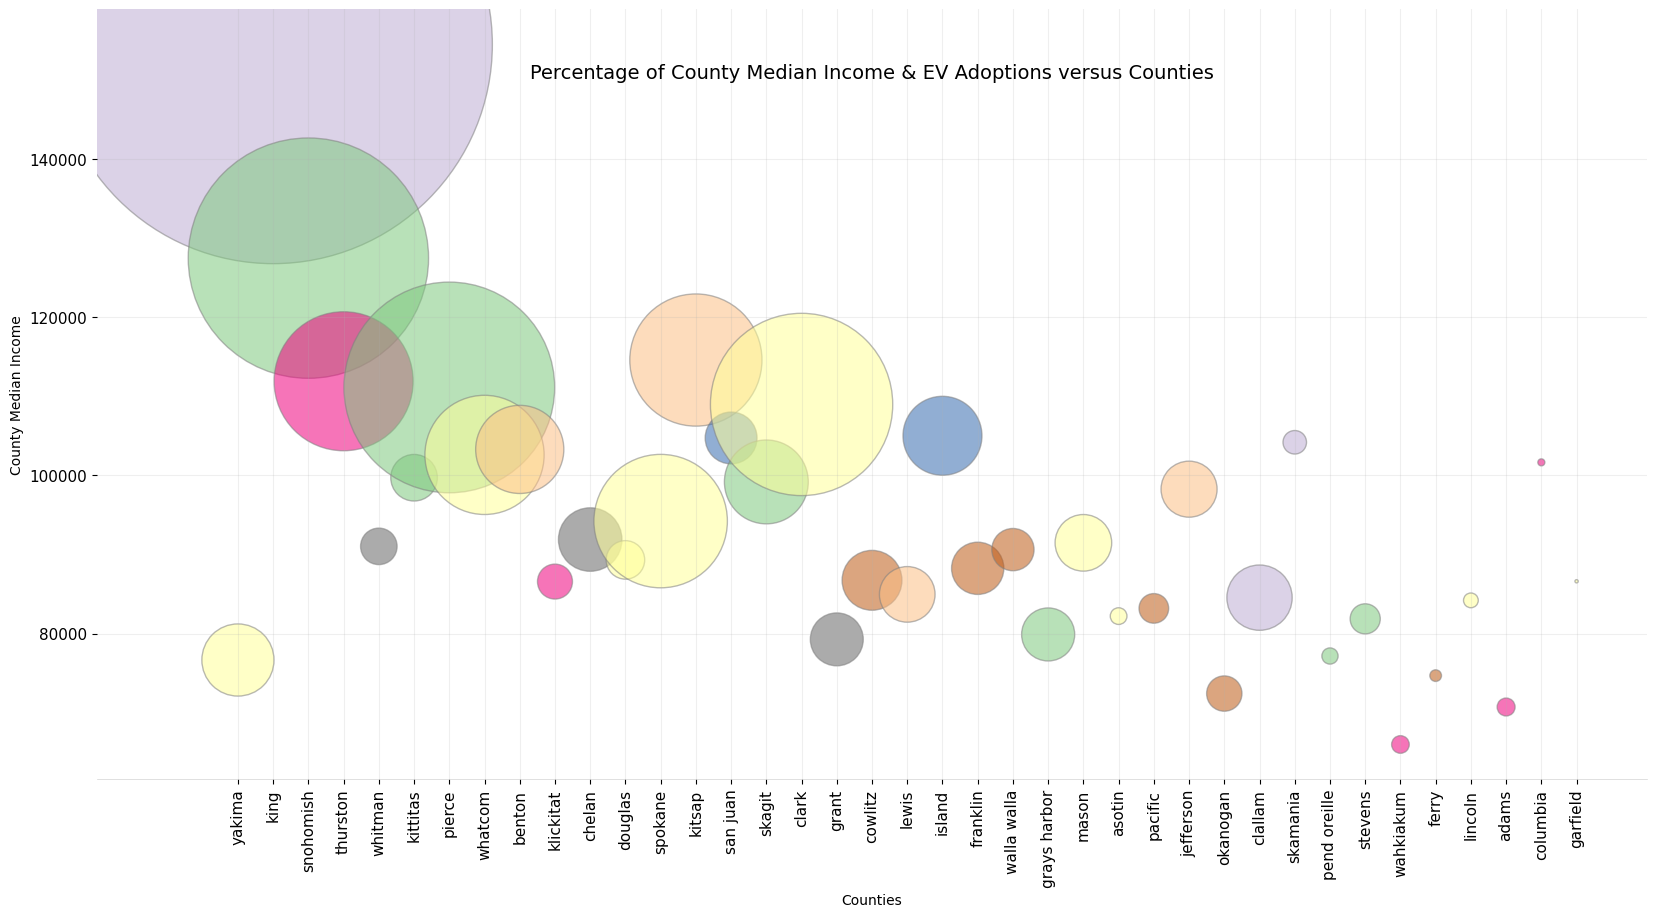

In [31]:
# {County name: Median Income} dictionary
name_inc = {county: county_inc.get_group(county).values[0] for county in county_count.keys()}

# List of ratio = (EV Count)/(Median Income)
ev_inc_ratio = [county_count_vals[i] / name_inc[list(county_count.keys())[i]] for i in range(len(county_count_vals))]
ev_inc_ratio_percentage = [round(value*100, 2) for value in ev_inc_ratio]  # Ratio to %

# Bubble size
scaled_county_count_vals = np.multiply(ev_inc_ratio, 1.2e5)  # Scaled up by 1.2e5

ratio_dict = {county: ev_inc_ratio_percentage[i] for i, county in enumerate(county_count.keys())}  # Dictionary {county: Median Income}
print(f'\n{{County: EVs_Income %}}\n{ratio_dict}\n\n')

colors = np.random.rand(len(uniq_names))
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(name_inc.keys(), name_inc.values(), s = scaled_county_count_vals, c = colors, cmap = 'Accent', edgecolors = 'gray', alpha = 0.55)

plt.xlabel(r'Counties', fontsize=10)
plt.ylabel(r'County Median Income', fontsize=10)
plt.title('Percentage of County Median Income & EV Adoptions versus Counties', fontsize=14, y=0.9)
plt.xticks(rotation=90, fontsize=11, fontweight='normal')
plt.yticks(fontsize=11)
plt.xlim(-4, len(name_inc.keys()) + 1)
# plt.ylim(ymin=-0.5e6, ymax = 3e6)
plt.grid(True, alpha = 0.2)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

# plt.savefig("../Output_data/Fig7.png")
plt.show()

#### Correlation Matrix

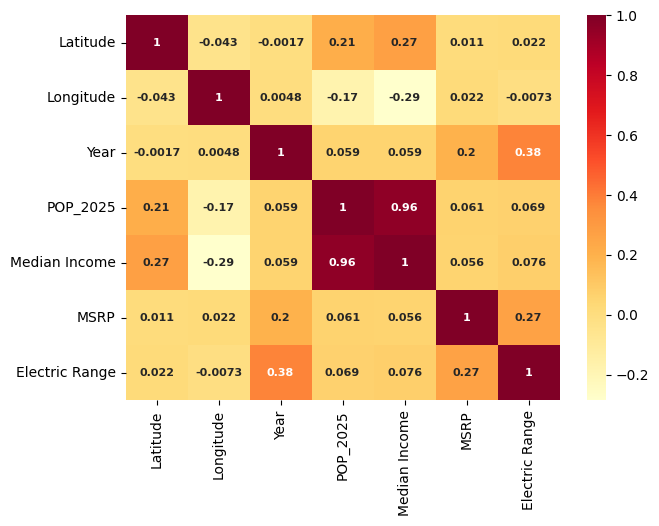

In [57]:
# Correlation Matrix
numeric_cols= ev[['Latitude', 'Longitude', 'Year', 'POP_2025', 'Median Income', 'MSRP', 'Electric Range']]
cor_mat = numeric_cols.corr()

# Create heatmap
plt.rcParams["figure.figsize"] = (7,5)
sns.heatmap(cor_mat, cmap = 'YlOrRd', annot=True, annot_kws={"fontsize": 8, "fontweight": "bold"})
plt.savefig("Figures/EDA_Fig04.png")
plt.show()

#### Distribution of EVs by Electric Range

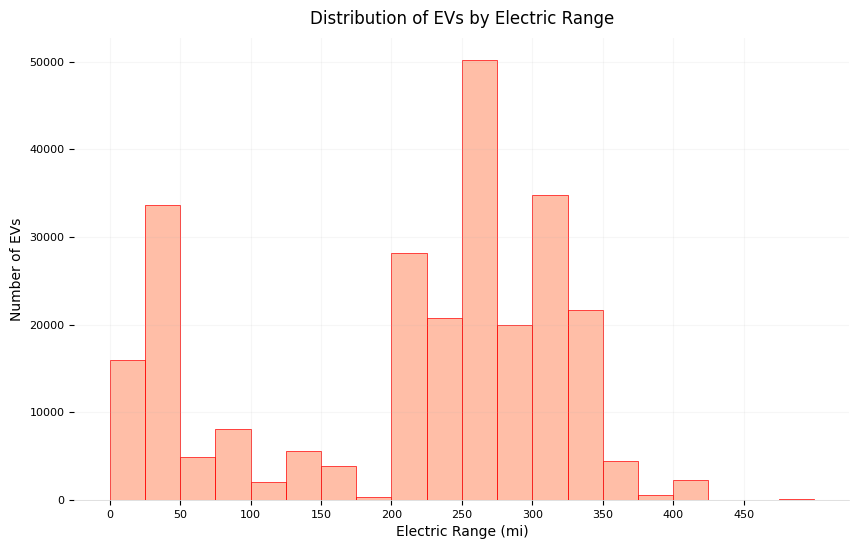

In [58]:

plt.figure(figsize=(10,6))

# Histogram for Electric Range
sns.histplot(
    ev['Electric Range'],
    bins=20,
    color='coral',
    alpha=0.5,
    edgecolor='red',
    linewidth=0.5,   
    binrange=(0, 500)
)

# Labels and formatting
plt.title('Distribution of EVs by Electric Range', fontsize=12, pad=10)
plt.xlabel('Electric Range (mi)', fontsize=10)
plt.ylabel('Number of EVs', fontsize=10)
plt.xticks(range(0, 500, 50), fontsize=8)
plt.yticks(fontsize=8)

plt.grid(alpha=0.1)
[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig05.png")
plt.show()

### Outliers and Box Plots of Numerical Features

In [19]:
# Create 2 new columns
ev['BEV Range'] = ev.loc[ev['Vehicle Type'] == 'BEV', 'Electric Range']
ev['PHEV Range'] = ev.loc[ev['Vehicle Type'] == 'PHEV', 'Electric Range']

ev['BEV Range'] = ev['BEV Range'].replace('', 0).fillna(0)
ev['PHEV Range'] = ev['PHEV Range'].replace('', 0).fillna(0)

ev['BEV Range'] = ev['BEV Range'].astype('int64')
ev['PHEV Range'] = ev['PHEV Range'].astype('int64')

ev_features = ['Year', 'BEV Range', 'PHEV Range', 'MSRP', 'Median Income', 'POP_2025']
ev_y = ['2000 - 2026', 'Miles', 'Miles', 'USD', 'USD', '']

print(ev.columns)

Index(['County', 'Latitude', 'Longitude', 'Year', 'Make', 'Model',
       'Vehicle Type', 'CAFV Eligibility', 'Year_Make_Model', 'POP_2025',
       'Median Income', 'MSRP', 'Dest. Charge', 'Tax Credit', 'Electric Range',
       'EV_count', 'BEV Range', 'PHEV Range'],
      dtype='object')


In [20]:
# List of features
ev_features = ['Year', 'BEV Range', 'PHEV Range', 'MSRP', 'Median Income', 'POP_2025']


def outliers(feature):
    # Exclude zeros
    ev_nonzero = ev[ev[feature] != 0]
    
    quartiles =  ev_nonzero[feature].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    extreme_lower_bound = lowerq - (3.0 * iqr)
    print(f'{feature}: {extreme_lower_bound}')
    extreme_upper_bound = upperq + (3.0 * iqr)
    print(f'{feature}: {extreme_upper_bound}\n')

    # outliers 
    outliers = ev_nonzero[(ev_nonzero[feature] < lower_bound) | (ev_nonzero[feature] > upper_bound)][feature]
    extreme_outliers = ev_nonzero[(ev_nonzero[feature] < extreme_lower_bound) | (ev_nonzero[feature] > extreme_upper_bound)][feature]
    
    if extreme_outliers.empty:
        print(f"{feature}'s potential extreme outliers: None found\n")
    else:
        print(f"{feature}'s potential extreme outliers:\n{extreme_outliers}\n")
        
#Calling function outliers    
for feature in ev_features:
    outliers(feature)  


Year: 2008.0
Year: 2036.0

Year's potential extreme outliers:
64638     2000
95756     2003
100783    2000
123343    2000
142806    2000
153970    2000
175307    2000
184760    2000
225948    2002
255156    2000
Name: Year, dtype: int64

BEV Range: -22.0
BEV Range: 559.0

BEV Range's potential extreme outliers: None found

PHEV Range: -30.0
PHEV Range: 89.0

PHEV Range's potential extreme outliers:
3507      153
4032      153
6779      153
8002      153
12997     153
         ... 
255022     97
255165     97
255762     97
256787     97
256832     97
Name: PHEV Range, Length: 633, dtype: int64

MSRP: -7611.0
MSRP: 101358.0

MSRP's potential extreme outliers:
28        115740
128       107490
173       107490
221       107490
226       115740
           ...  
256797    104990
256914    120990
256936    104990
256987    120295
256992    135700
Name: MSRP, Length: 3771, dtype: int64

Median Income: -18966.0
Median Income: 284582.0

Median Income's potential extreme outliers: None found

PO

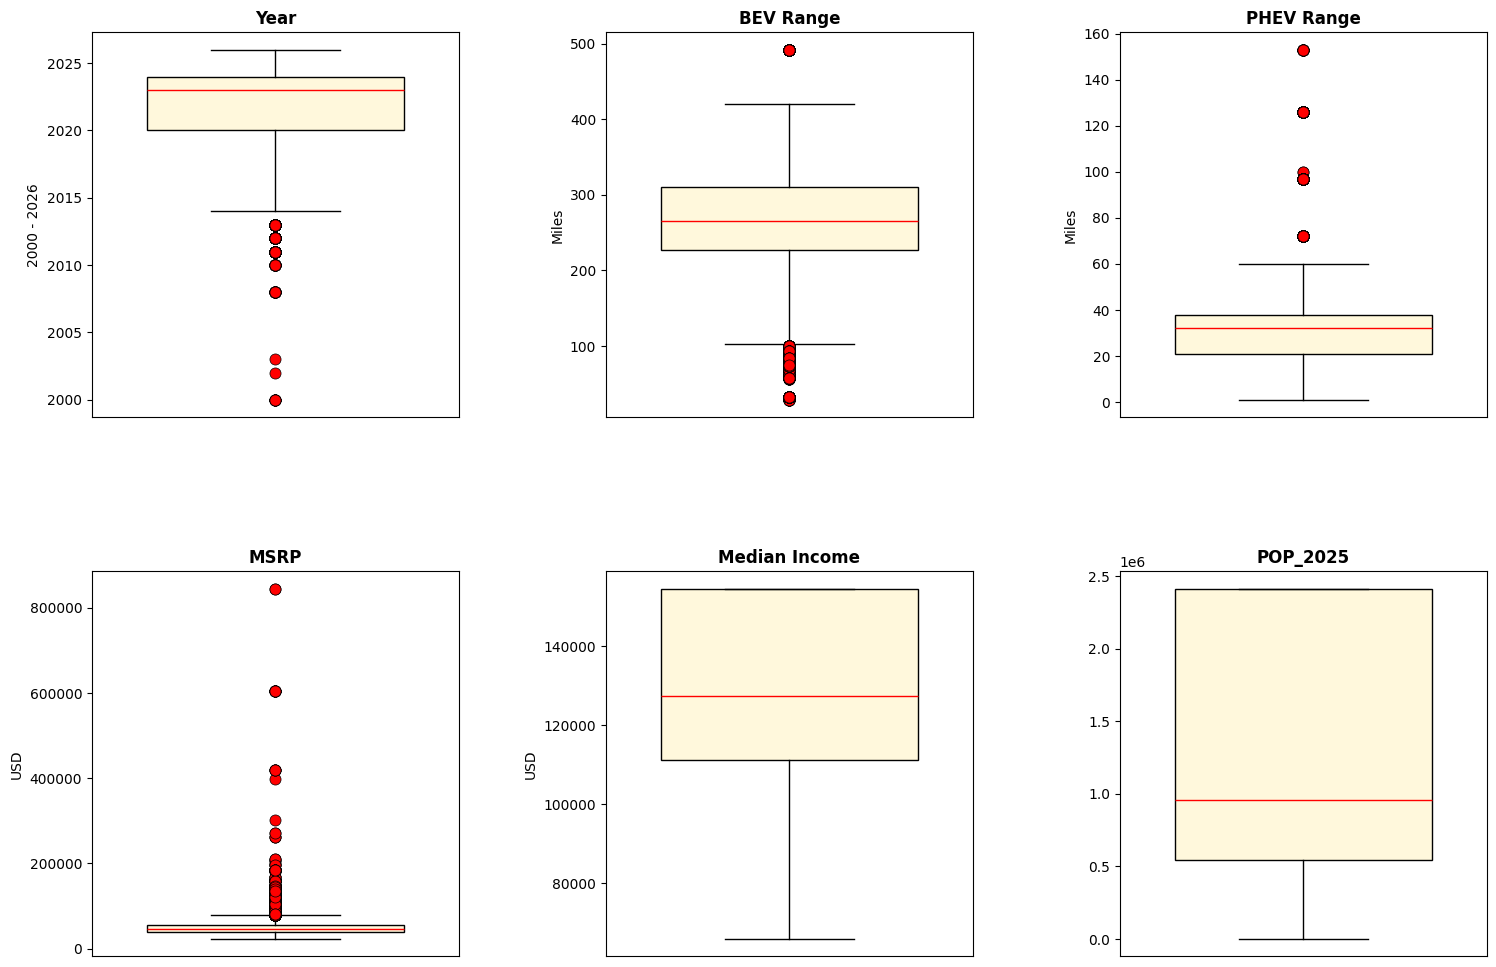

In [53]:

ev_features = ['Year', 'BEV Range', 'PHEV Range', 'MSRP', 'Median Income', 'POP_2025']
ev_y = ['2000 - 2026', 'Miles', 'Miles', 'USD', 'USD', '']

# Copy of ev with select columns in ev_features
ev_numeric = ev[ev_features].copy()

# Define figure with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Flatten the axes array for easier looping
axs = axs.flatten()

box_props = dict(color='black', facecolor='cornsilk')
med_props = dict(color='red')
outlier_props = dict(marker='o', markerfacecolor='red', markersize=8,
                     markeredgecolor='k', markeredgewidth=0.5)

# Loop through each feature
for j, column in enumerate(ev_features):
    if column == 'MSRP':
        ev_numeric_filtered = ev_numeric[ev_numeric['MSRP'] != 0]
        bp = axs[j].boxplot(ev_numeric_filtered['MSRP'], vert=True,
                            widths=0.7, patch_artist=True, boxprops=box_props)

    elif column == 'BEV Range':
        ev_numeric_filtered = ev_numeric[ev_numeric['BEV Range'] != 0]
        bp = axs[j].boxplot(ev_numeric_filtered['BEV Range'], vert=True,
                            widths=0.7, patch_artist=True, boxprops=box_props)

    elif column == 'PHEV Range':
        ev_numeric_filtered = ev_numeric[ev_numeric['PHEV Range'] != 0]
        bp = axs[j].boxplot(ev_numeric_filtered['PHEV Range'], vert=True,
                            widths=0.7, patch_artist=True, boxprops=box_props)
    else:
        bp = axs[j].boxplot(ev_numeric[column], vert=True, widths=0.7,
                            patch_artist=True, boxprops=box_props)

    # Style axes
    axs[j].set_title(column, fontsize=12, fontweight='bold')
    axs[j].set_ylabel(ev_y[j])
    axs[j].set_xticks([])

    for median in bp['medians']:
        median.set(**med_props)
    for flier in bp['fliers']:
        flier.set(**outlier_props)

# Hide any unused subplot if total < 6
if len(ev_features) < len(axs):
    for ax in axs[len(ev_features):]:
        ax.set_visible(False)
plt.savefig("Figures/EDA_Fig01.png")
plt.show()

In [22]:
# Filtering out values greater than 800000 from 'MSRP'
ev_pricey = ev[(ev['MSRP'] > 800000)]
ev_pricey

,County,Latitude,Longitude,Year,Make,Model,Vehicle Type,CAFV Eligibility,Year_Make_Model,POP_2025,Median Income,MSRP,Dest. Charge,Tax Credit,Electric Range,EV_count,BEV Range,PHEV Range
166437,king,47.61001,-122.18720,2015,PORSCHE,918,PHEV,Not Eligible,2015 PORSCHE 918,2411700,154490,845000,0,0,12,3747,0,12
224041,san juan,48.53448,-123.01648,2015,PORSCHE,918,PHEV,Not Eligible,2015 PORSCHE 918,18550,104737,845000,0,0,12,553,0,12


#### Descriptive Statistics for Numerical Features

In [24]:
# Separate BEV and PHEV subsets
bev_ev = ev[ev['Vehicle Type'] == 'BEV']
phev_ev = ev[ev['Vehicle Type'] == 'PHEV']

# Features to summarize
features = ['Electric Range', 'MSRP', 'Year', 'Median Income', 'POP_2025']

# Create a dictionary to store all results
summary_data = {}

# Loop through vehicle types
for vehicle_type, df in {'BEV': bev_ev, 'PHEV': phev_ev}.items():
    feature_stats = {}
    
    for feature in features:
        # Mask zeros for specific columns
        if feature in ['Electric Range', 'MSRP']:
            subset = df.loc[df[feature] != 0, feature]
        else:
            subset = df[feature]
        
        # Compute summary stats
        feature_stats[feature] = subset.agg(
            maximum='max',
            minimum='min',
            mean='mean',
            median='median',
            var='var',
            std='std'
        )
    
    summary_data[vehicle_type] = pd.DataFrame(feature_stats)

# Combine BEV and PHEV summaries side by side
summary_df = pd.concat(summary_data, axis=1)
summary_df.index.name = 'Statistic'

# Reorder
summary_df = summary_df.reindex(['maximum', 'minimum', 'mean', 'median', 'var', 'std'])
summary_df = summary_df.round(2)

# Convert large-value columns (like MSRP and POP_2025) to int
for col in summary_df.columns:
    if 'MSRP' in col or 'POP_2025' in col:
        summary_df[col] = summary_df[col].astype('int64')

# Disable scientific notation for display
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

summary_df

BEV                                                 \
          Electric Range       MSRP    Year Median Income      POP_2025   
Statistic                                                                 
maximum           492.00     420000 2026.00     154490.00       2411700   
minimum            29.00      22995 2000.00      65982.00          3950   
mean              260.02      49682 2021.93     133009.89       1509667   
median            265.00      44990 2023.00     154490.00       2411700   
var              4578.83  279775891    7.93  571724811.02  908684413880   
std                67.67      16726    2.82      23910.77        953249   

                    PHEV                                                 
          Electric Range       MSRP    Year Median Income      POP_2025  
Statistic                                                                
maximum           153.00     845000 2026.00     154490.00       2411700  
minimum             1.00      25835 2010.00      65982.00          2300  
mean               31.47      47362 2020.86     128492.06       1358424  
median             32.00      43690 2022.00     127475.00        959900  
var               205.56  314995316   12.99  646037901.93  960128973472  
std                14.34      17748    3.60      25417.28        979861

#### Base MSRP vs EV Adoption

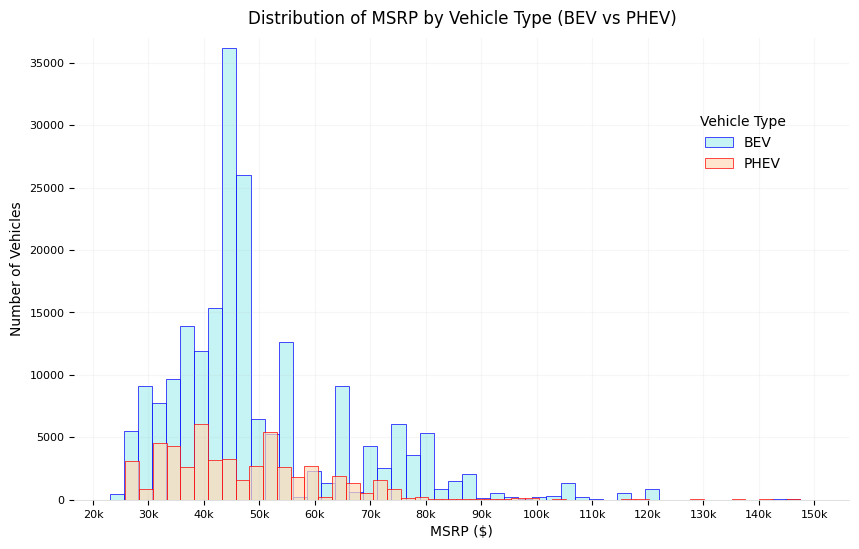

In [54]:

# Filter BEV and PHEV data
bev_data = ev[ev['Vehicle Type'].str.upper() == 'BEV']
phev_data = ev[ev['Vehicle Type'].str.upper() == 'PHEV']

plt.figure(figsize=(10,6))

# Histogram for BEV
sns.histplot(
    bev_data['MSRP'],
    bins=50,
    color='paleturquoise',
    # alpha=1.0,
    alpha=0.7,
    edgecolor='b',
    linewidth=0.5,   
    label='BEV',
    binrange=(22995, 150000)
    # binrange=(150000, 900000)
)

# Histogram for PHEV
sns.histplot(
    phev_data['MSRP'],
    bins=50,
    color='peachpuff',
    # alpha=1.0,
    alpha=0.7,
    edgecolor='r',
    linewidth=0.5,
    label='PHEV',
    binrange=(25835, 150000)
    # binrange=(150000, 900000)
)

# Labels and formatting
plt.title('Distribution of MSRP by Vehicle Type (BEV vs PHEV)', fontsize=12, pad=10)
plt.xlabel('MSRP ($)', fontsize=10)
plt.ylabel('Number of Vehicles', fontsize=10)
plt.xticks(range(20000, 150001, 10000), [f'{x//1000}k' for x in range(20000, 150001, 10000)], fontsize=8)
# plt.xticks(range(150000, 900001, 100000), [f'{x//100000}00k' for x in range(150000, 900001, 100000)], fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0, 37000)
# plt.ylim(0, 10000)
plt.legend(title='Vehicle Type', loc='upper right', frameon=False)
plt.grid(alpha=0.1)

plt.legend(title='Vehicle Type', loc=(0.8, 0.7), frameon=False)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig02.png")
plt.show()

#### Pie Chart: CAFV Eligibility

CAFV Eligibility
Eligible        225486
Not Eligible     31552
Name: count, dtype: int64 



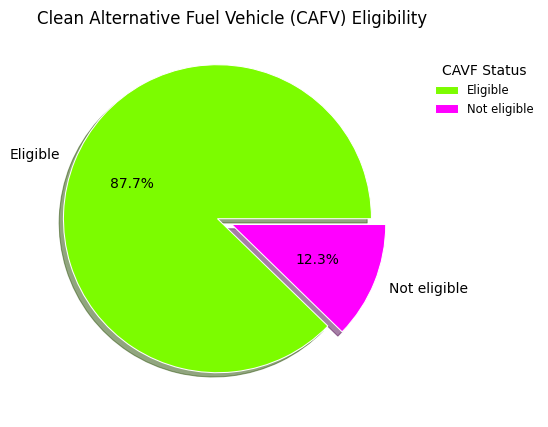

In [511]:

CAVF = ev['CAFV Eligibility'].value_counts()
print(ev['CAFV Eligibility'].value_counts(), '\n')
status = ['Eligible', 'Not eligible']

plt.rcParams["figure.figsize"] = (5, 5)
wedges, labels, autopct_text = plt.pie(CAVF.tolist(),
                                       labels=status,
                                       colors=['lawngreen', 'magenta'], 
                                       startangle=0, shadow=True, explode=(0.1, 0), autopct='%1.1f%%',
                                       wedgeprops={'linewidth': 0.75, 'edgecolor': 'white'})

custom_legend = [f'{label}' for label, percent in zip(status, CAVF.tolist())]

plt.legend(wedges, custom_legend, title='CAVF Status', loc='center left', bbox_to_anchor=(1.0, 0.85), fontsize='small', edgecolor = 'white')

plt.title("Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.show()

### Bar Plot for EV Categories and CAFV Eligibility

Classification:
Vehicle Type
BEV     204665
PHEV     52373
Name: count, dtype: int64 


Percentage of each catagory:
Vehicle Type
BEV     79.6
PHEV    20.4
Name: proportion, dtype: object %




CAFV Eligibility  Eligible  Not Eligible
Vehicle Type                            
BEV                 196830          7835
PHEV                 28656         23717 



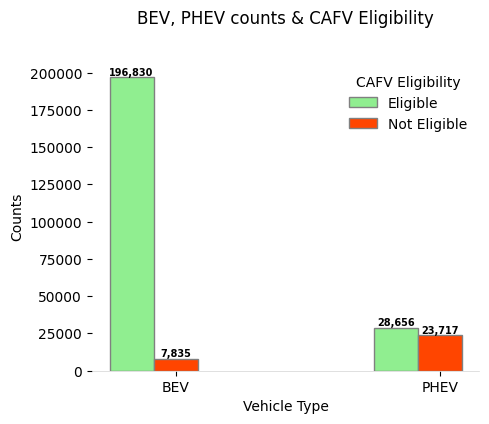

In [56]:
import numpy as np

plt.rcParams["figure.figsize"] = (5, 4)


ev['Vehicle Type'] =ev['Vehicle Type'].astype('object')
print('Classification:')
print(ev['Vehicle Type'].value_counts(), '\n')

print('\nPercentage of each catagory:')
print(ev['Vehicle Type'].value_counts(normalize=True).mul(100).round(1).astype(str), '%\n\n\n\n')

eligibility_ev_type = ev.groupby(['Vehicle Type', 'CAFV Eligibility']).size().unstack()
print(eligibility_ev_type, '\n')

eligibility_ev_type.fillna(0, inplace=True)

# categories and the number of bars
categories = eligibility_ev_type.index
num_bars = len(categories)  # 2

bar_width = 0.05
x = np.arange(len(eligibility_ev_type))  # one group per vehicle type (BEV, PHEV)

# Spacing between groups
group_spacing = 0.3 
bar_positions = x * group_spacing

colors = ['lightgreen', 'orangered']

fig, ax = plt.subplots()

# Plot each group of bars side by side
for i, eligibility in enumerate(eligibility_ev_type.columns):
    ax.bar(bar_positions + (i * bar_width), eligibility_ev_type[eligibility], width=bar_width, label=eligibility, color=colors[i], edgecolor='gray')

    # Display numbers on top of each bar
    for idx, val in enumerate(eligibility_ev_type[eligibility]):
        ax.text(bar_positions[idx] + (i * bar_width), val + 5, f'{int(val):,}', ha='center', va='bottom',fontsize=7,  fontweight='bold', rotation=0, color='black')

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(categories)

ax.set_xlabel(r'Vehicle Type', fontsize=10)
ax.set_ylabel(r'Counts', fontsize=10)
ax.set_title('BEV, PHEV counts & CAFV Eligibility', fontsize=12, y=1.1)
ax.legend(title='CAFV Eligibility', loc='upper right', frameon=False)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig03b.png")
plt.show()


#### EV Locations

#### Drawing State & County Beoundaries

In [46]:
import geopandas as gpd

gdf_ev = gpd.GeoDataFrame(
    ev,
    geometry=gpd.points_from_xy(ev["Longitude"], ev["Latitude"]),
    crs="EPSG:4326"  # WGS84 coordinate reference system (lat/lon)
)

# Shapefile for US states downloaded from Census TIGER/Line
states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_5m.zip")
wa = states[states["NAME"] == "Washington"]

counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_5m.zip")
wa_counties = counties[counties["STATEFP"] == "53"]

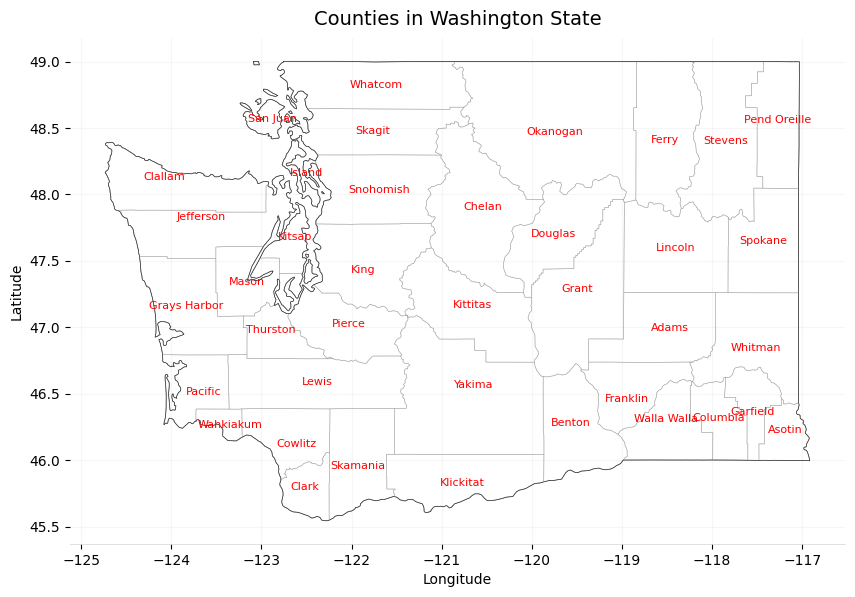

In [47]:
fig, ax = plt.subplots(figsize=(10, 12))

# Plot Washington state and county boundaries
wa.boundary.plot(ax=ax, color="black", linewidth=0.5)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.5)

# Add county labels
for idx, row in wa_counties.iterrows():
    # Using centroid to keep labels inside the polygon
    point = row['geometry'].representative_point()  # safer for irregular polygons
    ax.text(
        point.x, point.y,
        row['NAME'],
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='red',
        alpha=1.0
    )
plt.title("Counties in Washington State", fontsize=14, y=1.01)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(frameon=False, loc=(0.9, 1.01))
plt.grid(True, alpha=0.1)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')
plt.show()

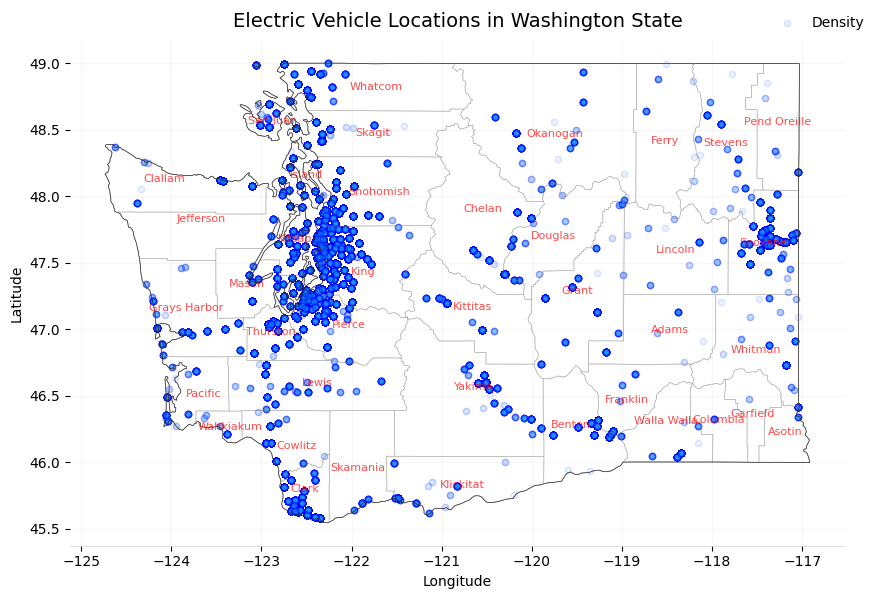

In [59]:
fig, ax = plt.subplots(figsize=(10, 12))

# Plot Washington state and county boundaries
wa.boundary.plot(ax=ax, color="black", linewidth=0.5)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.5)

# Add county labels
for idx, row in wa_counties.iterrows():
    # Use centroid or representative_point to avoid labels outside the polygon
    point = row['geometry'].representative_point()  # safer for irregular polygons
    ax.text(
        point.x, point.y,
        row['NAME'],
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='r',
        alpha=0.7
    )

# Plot EV points on top
gdf_ev.plot(
    ax=ax,
    color="dodgerblue",
    markersize=20,
    edgecolor='b',
    alpha=0.1,
    label="Density"
)

plt.title("Electric Vehicle Locations in Washington State", fontsize=14, y=1.01)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(frameon=False, loc=(0.9, 1.01))
plt.grid(True, alpha=0.1)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig06.png")
plt.show()

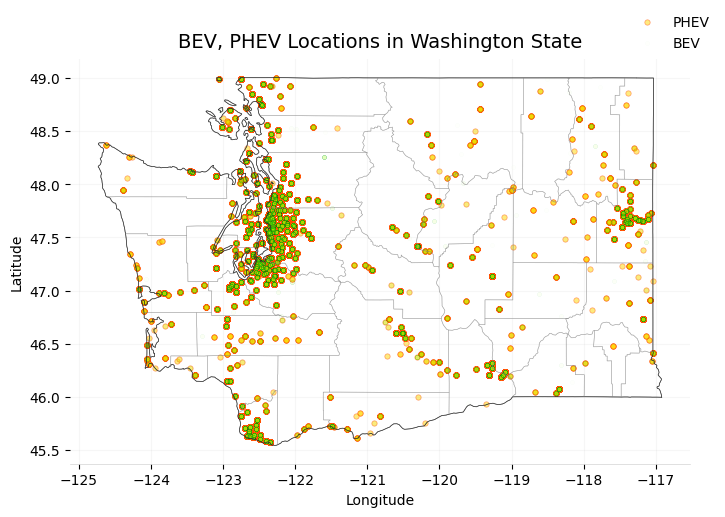

In [60]:
fig, ax = plt.subplots(figsize=(8, 10))

# Plot Washington state and county boundaries
wa.boundary.plot(ax=ax, color="black", linewidth=0.5)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.5)

# Separate BEV and PHEV points
bev_gdf = gdf_ev[gdf_ev['Vehicle Type'].str.upper() == 'BEV']
phev_gdf = gdf_ev[gdf_ev['Vehicle Type'].str.upper() == 'PHEV']

# Plot PHEV points
phev_gdf.plot(
    ax=ax,
    color="gold",
    markersize=15,
    edgecolor='orangered',
    linewidth=0.5,
    alpha=0.5,
    label="PHEV"
)
# Plot BEV points
bev_gdf.plot(
    ax=ax,
    color="greenyellow",
    markersize=10,
    edgecolor='limegreen',
    linewidth=0.5,
    alpha=0.01,
    label="BEV"
)

# Titles and labels
plt.title("BEV, PHEV Locations in Washington State", fontsize=14, y=1.01)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Legend and grid
plt.legend(frameon=False, loc=(0.9, 1.01))
plt.grid(True, alpha=0.1)

# Clean up borders
[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig07.png")
plt.show()

In [62]:
# Count EVs per unique (Longitude, Latitude)
counts = ev[["Longitude", "Latitude"]].value_counts().reset_index(name="EV_count")
ev = ev.merge(counts, on=["Longitude", "Latitude"], how="left")

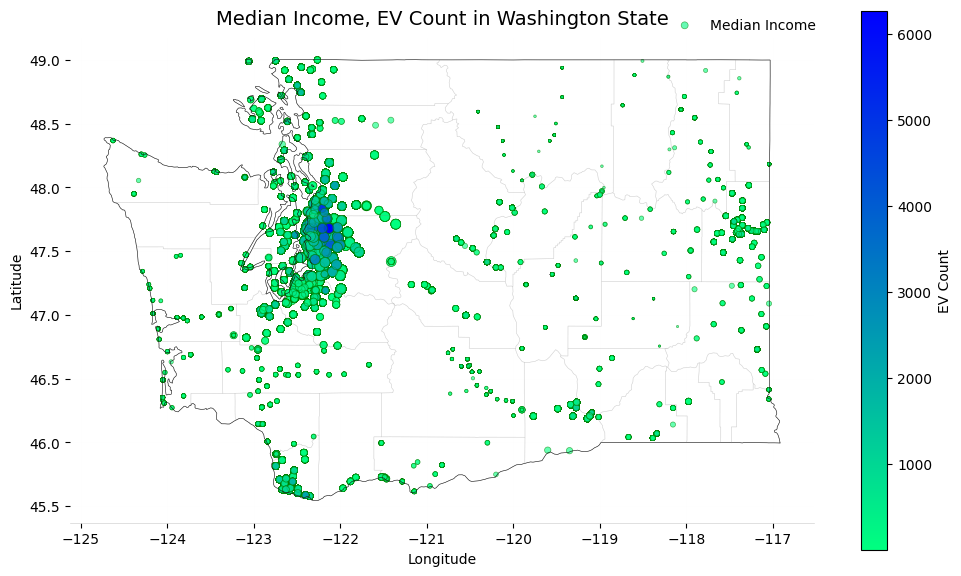

In [63]:
# Size scaling
min_size, max_size = 0, 50
sizes = ((ev["Median Income"] - ev["Median Income"].min()) /
         (ev["Median Income"].max() - ev["Median Income"].min())) * (max_size - min_size) + min_size

colors = ev["EV_count"]
cmap = plt.get_cmap("winter_r")
norm = plt.Normalize(vmin=colors.min(), vmax=colors.max())

face_colors = cmap(norm(colors))
# edge_colors = np.clip(face_colors[:, :3]*0.6, 0, 1)
# edge_colors = np.column_stack([edge_colors, face_colors[:, 3]])
edge_colors ='g'

fig, ax = plt.subplots(figsize=(12, 7))
wa.boundary.plot(ax=ax, color="black", linewidth=0.4)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.2)

sc = ax.scatter(ev["Longitude"], ev["Latitude"],
                s=sizes,
                c=face_colors,
                edgecolor=edge_colors,
                linewidths=0.5, 
                alpha=0.6,
                label="Median Income")

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label("EV Count")

ax.set_title("Median Income, EV Count in Washington State", fontsize=14, y=1.01)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(frameon=False, loc=(0.8, 1.0))
ax.grid(True, alpha=0.01)
for side in ['right', 'top', 'left']:
    plt.gca().spines[side].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig08.png")
plt.show()

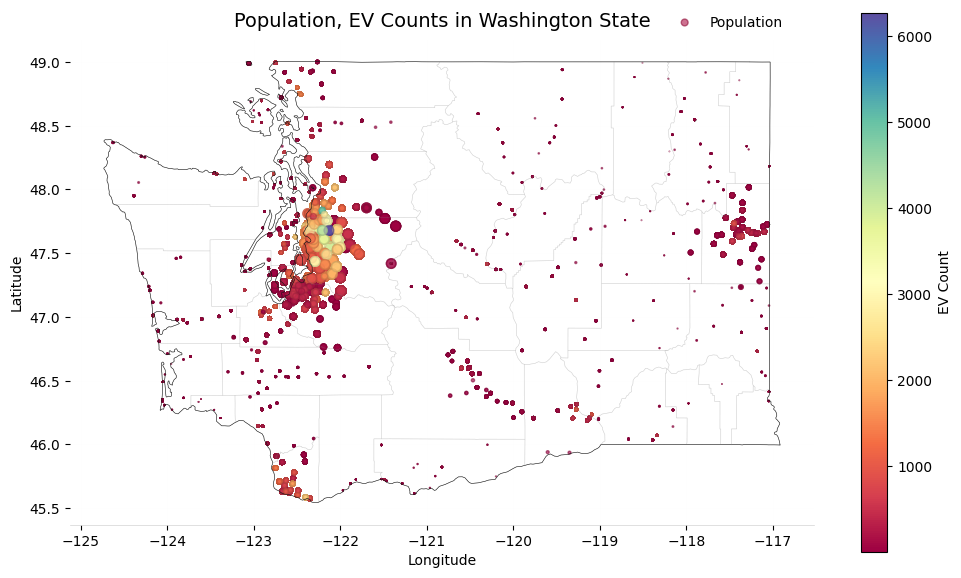

In [64]:
import geopandas as gpd
import matplotlib.colors as mcolors

ev_loc = ev[["Longitude", "Latitude", "POP_2025"]]

# Count number of EVs per (Longitude, Latitude) pair
ev_counts = ev.groupby(['Longitude', 'Latitude']).size().reset_index(name='Count')

# Merge counts back into ev DataFrame
ev_loc = ev_loc.merge(ev_counts, on=['Longitude', 'Latitude'], how='left')

x = ev_loc["Longitude"]
y = ev_loc["Latitude"]
sizes = ev_loc["POP_2025"] / 50000
colors = ev_loc['Count']

# Colormap
cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(vmin=colors.min(), vmax=colors.max())

face_colors = cmap(norm(colors))
edge_colors = face_colors[:, :3] * 0.75
edge_colors = np.clip(edge_colors*1.1, 0, 1)
edge_colors = np.column_stack([edge_colors, face_colors[:, 3]])

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Washington boundary
wa.boundary.plot(ax=ax, color="black", linewidth=0.4)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.2)

# Overlay EV points
sc = ax.scatter(x, y,
                s=sizes,
                c=face_colors,
                edgecolor=edge_colors,
                alpha=0.6,
                label="Population")

# Colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('EV Count')

ax.set_title("Population, EV Counts in Washington State", fontsize=14, y=1.01)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(frameon=False, loc=(0.8, 1.01))
ax.grid(True, alpha=0.01)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.savefig("Figures/EDA_Fig09.png")
plt.show()

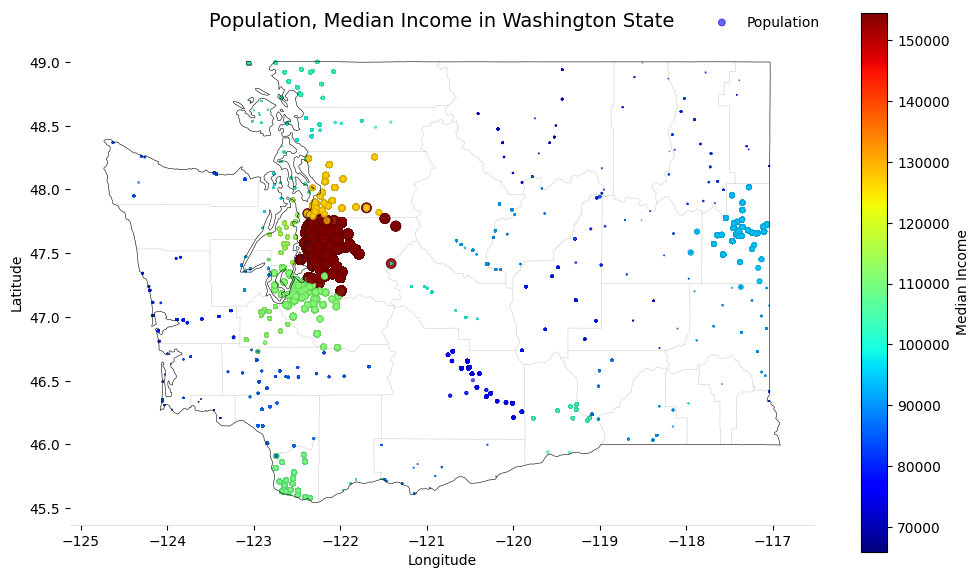

In [592]:
import geopandas as gpd
import matplotlib.colors as mcolors

x = ev["Longitude"]
y = ev["Latitude"]
sizes = ev["POP_2025"] / 50000
colors = ev["Median Income"]

# Colormap
cmap = plt.get_cmap("jet")
norm = plt.Normalize(vmin=colors.min(),
                     vmax=colors.max())
face_colors = cmap(norm(colors))
edge_colors = face_colors[:, :3] * 0.75
edge_colors = np.clip(edge_colors*1.1, 0, 1)
edge_colors = np.column_stack([edge_colors, face_colors[:, 3]])
# edge_colors = 'b'

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Washington boundary
wa.boundary.plot(ax=ax, color="black", linewidth=0.4)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.2)

# Overlay EV points
sc = ax.scatter(x, y,
                s=sizes,
                c=face_colors,
                edgecolor=edge_colors,
                linewidths=0.75, 
                alpha=0.6,
                label="Population")
# Colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Median Income')

ax.set_title("Population, Median Income in Washington State", fontsize=14, y=1.01)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(frameon=False, loc=(0.85, 1.01))
ax.grid(True, alpha=0.01)
[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')
plt.show()

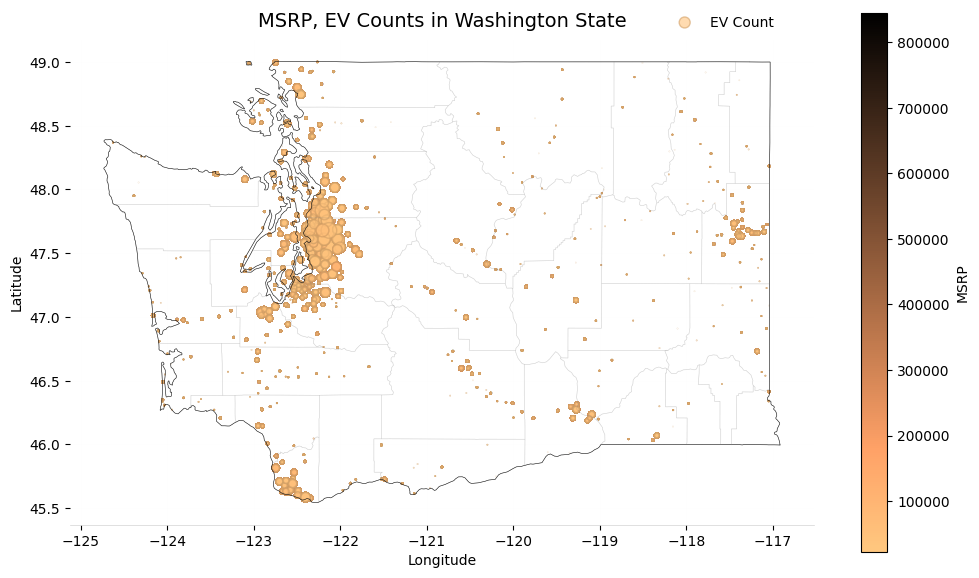

In [604]:
import geopandas as gpd
import matplotlib.colors as mcolors

ev_loc = ev[["Longitude", "Latitude", "MSRP"]]

# Count number of EVs per (Longitude, Latitude) pair
ev_counts = ev.groupby(['Longitude', 'Latitude']).size().reset_index(name='Count')

# Merge counts back into ev DataFrame
ev_loc = ev_loc.merge(ev_counts, on=['Longitude', 'Latitude'], how='left')

x = ev_loc["Longitude"]
y = ev_loc["Latitude"]
sizes = ev_loc['Count']/50
colors = ev_loc["MSRP"]

# Colormap
cmap = plt.get_cmap("copper_r")
norm = plt.Normalize(vmin=colors.min(), vmax=colors.max())

face_colors = cmap(norm(colors))
edge_colors = face_colors[:, :3] * 0.75
edge_colors = np.clip(edge_colors*1.1, 0, 1)
edge_colors = np.column_stack([edge_colors, face_colors[:, 3]])

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Washington boundary
wa.boundary.plot(ax=ax, color="black", linewidth=0.4)
wa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.4, alpha=0.2)

# Overlay EV points
sc = ax.scatter(x, y,
                s=sizes,
                c=face_colors,
                edgecolor=edge_colors,
                alpha=0.6,
                label="EV Count")

# Colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('MSRP')

ax.set_title("MSRP, EV Counts in Washington State", fontsize=14, y=1.01)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(frameon=False, loc=(0.8, 1.01))
ax.grid(True, alpha=0.01)

[plt.gca().spines[side].set_visible(False) for side in ['right', 'top', 'left']]
plt.gca().spines['bottom'].set_linewidth(0.5), plt.gca().spines['bottom'].set_color('lightgray')

plt.show()